# Data Loading Functions
Below is an example of how to load data using the functions created in `get_data.py`.

In [20]:
# GET DATA
import pandas as pd
import numpy as np

from get_data import get_assets, get_positional_data

get_assets()
positions = get_positional_data()

assets previously downloaded
positional data already downloaded.
reading positional data.
returning positional data.


This is how to obtain cleaned offensive positional data.

In [21]:
import form_pred
import importlib
importlib.reload(form_pred)
from form_pred import clean_positional

clean_pos = clean_positional(positions)

In [22]:
clean_pos.head()

,FBL0_x,FBR0_x,HBL0_x,HBL1_x,HBR0_x,HBR1_x,QB0_x,QB1_x,RBL0_x,RBL1_x,...,FB,HB,QB,RB,TE,WR,score_differential,possessionTeam,down,timeRemaining
0,-5.12,0.00,0.0,0.0,0.0,0.0,-1.73,0.0,0.00,0.0,...,1,0,1,1,1,2,0.0,ATL,1,3600
1,0.00,0.00,0.0,0.0,0.0,0.0,-1.60,0.0,-7.37,0.0,...,0,0,1,1,1,3,0.0,ATL,1,3490
2,0.00,0.00,0.0,0.0,0.0,0.0,-5.56,0.0,0.00,0.0,...,0,0,1,2,1,2,0.0,ATL,2,3485
3,0.00,0.00,0.0,0.0,0.0,0.0,-5.17,0.0,-4.24,0.0,...,0,0,1,1,1,3,0.0,ATL,3,3481
4,0.00,-4.59,0.0,0.0,0.0,0.0,-4.88,0.0,-1.33,0.0,...,1,0,1,1,3,0,0.0,ATL,3,3359


This is an example of how to generate ball quadrants, which is the variable we are trying to predict.

In [23]:
import ball_movement
import importlib
importlib.reload(ball_movement)
from ball_movement import ball_quadrants, make_quad_chart

quads = ball_quadrants(positions,4)

make_quad_chart(quads)

alt.Chart(...)

This is an example of how to use our defensive cleaning pipeline. The main input is `n_cuts`, which is used to average player positions based on a number of quartile cuts.

In [24]:
import def_clean
importlib.reload(def_clean)
from def_clean import DefensiveCleaning

def_cleaning = DefensiveCleaning(n_cuts=11)
d = def_cleaning.generate_full_df(1, 14)

..............................initializing
positional data already downloaded.
reading positional data.
returning positional data.
..data downloaded...
...Week 1 loaded...
...filtered...
...transformed...
...time reduced...
...starting dataframe generated...
...action type generated...
.....Week 1 COMPLETE.....

   7.14% COMPLETE   

--- 0.5 minutes elapsed ---

the weeks complete:  [1]
...Week 2 loaded...
...filtered...
...transformed...
...time reduced...
...starting dataframe generated...
...action type generated...
.....Week 2 COMPLETE.....

   14.29% COMPLETE   

--- 1.0 minutes elapsed ---

the weeks complete:  [1 2]
...Week 3 loaded...
...filtered...
...transformed...
...time reduced...
...starting dataframe generated...
...action type generated...
.....Week 3 COMPLETE.....

   21.43% COMPLETE   

--- 1.6 minutes elapsed ---

the weeks complete:  [1 2 3]
...Week 4 loaded...
...filtered...
...transformed...
...time reduced...
...starting dataframe generated...
...action type gene

# Defensive Clustering

To figure out effective defensive features to feed into the Pipeline, we ran PCA and K-means algorithms over various column combinations. We then chose those with the highest silhouette scores for optimization in our model files.

In [25]:
# created additional features from the output from def_clean
d = pd.read_csv('assets/def_clean_output.csv')
d['extra_blitzers'] = d['numberOfPassRushers'] - d['DL']
d['on_line_coverage'] = d['defendersInTheBox'] - d['numberOfPassRushers']
d.shape

(17013, 191)

The optimal number of components is approximately  2


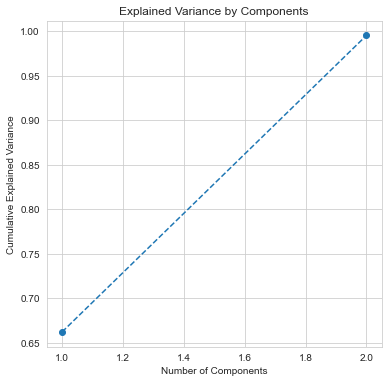

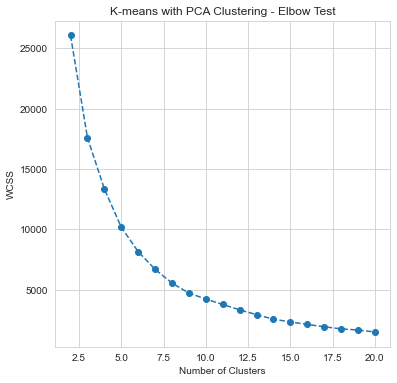

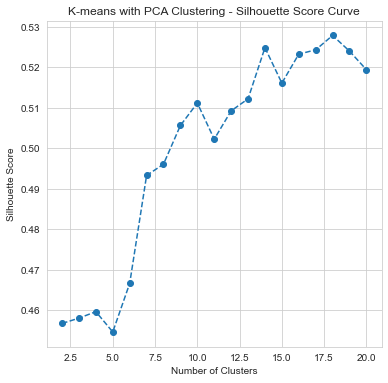

The component names are as follows:  ['Component 1', 'Component 2']


In [29]:
# imported modules from def_clust to run multiple feature combinations through pca and kmeans

import def_clust
import importlib
importlib.reload(def_clust)
from def_clust import return_pca_and_clusters, kmeans_visual
  
columns1=['defendersInTheBox','extra_blitzers','on_line_coverage','numberOfPassRushers','DB','LB','DL','yardline_first_dir','yardline_100_dir','%B','%M','%Z']
columns2=['%B','%M','%Z']
columns3=['defendersInTheBox','numberOfPassRushers','DB','LB','DL','%M','%Z']
columns4=['DB','LB','DL','%B','%M','%Z']
columns5=['extra_blitzers','on_line_coverage','yardline_first_dir','%B','%M']
columns6=['yardline_first_dir','yardline_100_dir','%B','%M','%Z']
columns7=['defendersInTheBox','numberOfPassRushers','yardline_first_dir','%M','%Z']
columns8=['DB','LB','DL','yardline_first_dir','yardline_100_dir','%B','%M','%Z']
columns9=['defendersInTheBox','numberOfPassRushers','DB','LB','DL','yardline_first_dir','yardline_100_dir']
columns10=['extra_blitzers','on_line_coverage','yardline_first_dir','yardline_100_dir','%M','%Z']
columns11=['yardline_first_dir','%B','%M']
columns12=['yardline_first_dir','yardline_100_dir','%B']
columns13=['DB','LB','DL']
columns14=['extra_blitzers','on_line_coverage','yardline_first_dir','%B','%M']
columns15=['extra_blitzers','on_line_coverage','yardline_first_dir','yardline_100_dir']
columns16=['yardline_100_dir','yardline_first_dir','%B','%M']
columns17=['extra_blitzers','on_line_coverage','yardline_100_dir','yardline_first_dir']
columns18=['defendersInTheBox','numberOfPassRushers','yardline_first_dir']
columns19=['extra_blitzers','on_line_coverage','DB','yardline_first_dir','yardline_100_dir','%Z']
columns20=['extra_blitzers','on_line_coverage','DB','yardline_first_dir','%Z']
columns21=['extra_blitzers','DB','yardline_first_dir','%Z']
columns22=['extra_blitzers','on_line_coverage','DB']

# run selected columns through PCA and clustering with n clusters
df_seg = return_pca_and_clusters(d, columns=columns12, n_clusters=10)

In [30]:
#highest performing column clusters based on silhouette score
columns2=['%B','%M','%Z']
columns4=['DB','LB','DL','%B','%M','%Z']
columns6=['yardline_first_dir','yardline_100_dir','%B','%M','%Z']
columns7=['defendersInTheBox','numberOfPassRushers','yardline_first_dir','%M','%Z']
columns11=['yardline_first_dir','%B','%M']
columns12=['yardline_first_dir','yardline_100_dir','%B']
columns13=['DB','LB','DL']
columns15=['extra_blitzers','on_line_coverage','yardline_first_dir','yardline_100_dir']
columns16=['yardline_100_dir','yardline_first_dir','%B','%M']
columns17=['extra_blitzers','on_line_coverage','yardline_100_dir','yardline_first_dir']
columns18=['defendersInTheBox','numberOfPassRushers','yardline_first_dir']


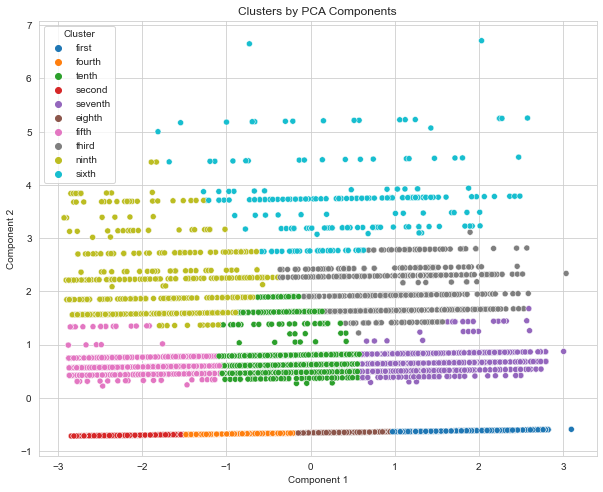

In [31]:
# visual play data points by PCA components and corresponding cluster
kmeans_visual(df_seg, 'Component 1', 'Component 2')

# Play Visualization
Following are some examples of how to use our play visualization functions. `create_starting_chart` creates a chart of starting positions for each player. `create_full_chart` averages positional data based on a number of quartile cuts, and uses interactive features to show the positions of players and the football averaged at these quartiles.

In [32]:
from play_vis import create_starting_chart, create_full_chart

game_id = positions['gameId'].iloc[0]
play_id = positions['playId'].iloc[0]

# Below is an example of how to create the starting chart.
create_starting_chart(positions, game_id, play_id)

Play description: M.Ryan pass short right to J.Jones pushed ob at ATL 30 for 10 yards (M.Jenkins).


alt.LayerChart(...)

In [33]:
# Below is an example of how to create the full chart.
create_full_chart(positions, game_id, play_id, n_cuts=20)

Play description: M.Ryan pass short right to J.Jones pushed ob at ATL 30 for 10 yards (M.Jenkins).


alt.LayerChart(...)

# Pipeline Demo
Following is a demo of how the pipeline wrapper can be used. First, instantiate the class. This will load all requisite data.

In [34]:
from pipeline import FullPipeWrapper

pipe_wrap = FullPipeWrapper()

positional data already downloaded.
reading positional data.
returning positional data.


Next, build the pipeline with a chosen model.

In [35]:
from sklearn.tree import DecisionTreeClassifier

pipe_full_dtree = pipe_wrap.build_pipe(side="both", model=DecisionTreeClassifier())

This is one method for hyperparameter tuning grid search. We tested with a few parameters to illustrate.

In [36]:
from sklearn.model_selection import GridSearchCV

params = {'model__max_depth': range(3, 10),
          'full_pipe__def__def_clust_pass__def_clust__n_clusters': range(2, 7)}

grid_full_dtree = GridSearchCV(pipe_full_dtree, params)

In [37]:
grid_full_dtree.fit(pipe_wrap.X_train, pipe_wrap.y_train_x)

GridSearchCV(estimator=Pipeline(steps=[('full_pipe',
                                        ColumnTransformer(transformers=[('off',
                                                                         Pipeline(steps=[('full_cols',
                                                                                          Pipeline(steps=[('off_pre_one',
                                                                                                           ColumnTransformer(transformers=[('info_scale',
                                                                                                                                            StandardScaler(),
                                                                                                                                            Index(['perc_left', 'perc_right', 'perc_behind_los', 'FB', 'HB', 'QB', 'RB',
       'TE', 'WR', 'score_differential', 'timeRemaining', 'yardline_first_dir...
       'SSR1_x_start', 'SSR1_y_s

In [38]:
grid_full_dtree.best_params_

{'full_pipe__def__def_clust_pass__def_clust__n_clusters': 2,
 'model__max_depth': 4}

In [39]:
grid_full_dtree.best_score_

0.4258194393246663

Below are a few examples of CV result plots for grid search. These plots can help with tuning as they indicate how performance changes with changes in numerical parameters.

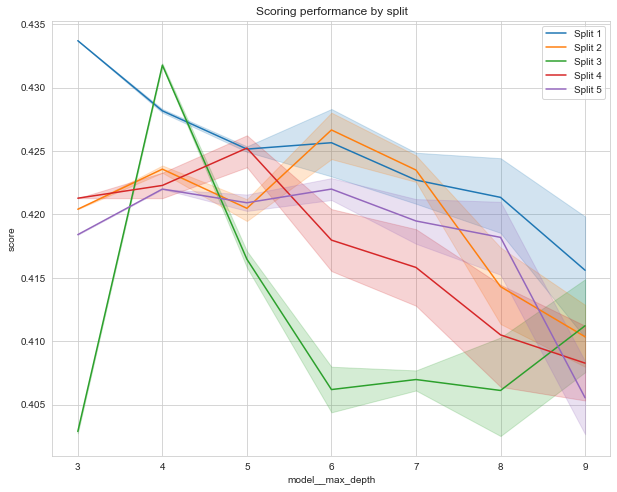

In [43]:
from grid_result_plot import create_result_plot
import matplotlib.pyplot as plt

plot = create_result_plot(grid_full_dtree, "model__max_depth")
plt.savefig('visualizations/example_split_plot.png')

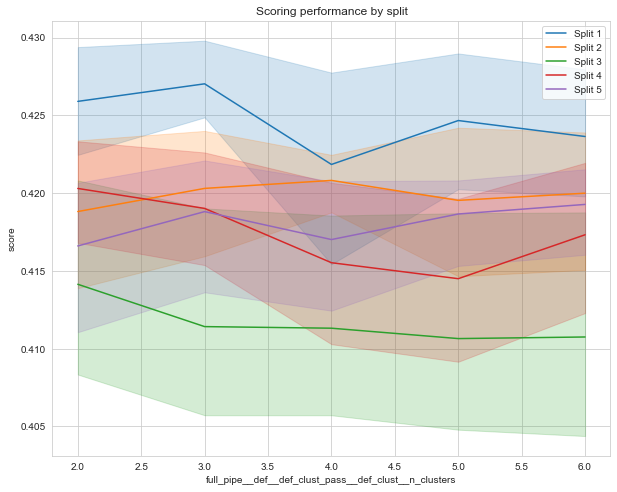

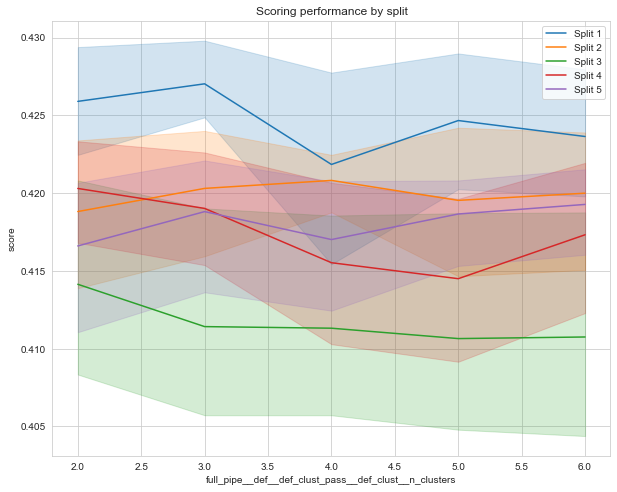

In [44]:
create_result_plot(grid_full_dtree, "full_pipe__def__def_clust_pass__def_clust__n_clusters")

When you want to use another model, just run the `build_pipe` method again.